In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
df = pd.read_csv(url)

In [3]:
# Data cleaning and preprocessing
df['date'] = pd.to_datetime(df['date'])

In [4]:
# Get the latest data for each country
latest_data = df.sort_values('date').groupby('location').last().reset_index()

In [5]:
# Remove aggregated regions and focus on countries
excluded_locations = ['World', 'Upper middle income', 'Lower middle income', 'High income', 'Low income', 'European Union']
latest_data = latest_data[~latest_data['location'].isin(excluded_locations)]

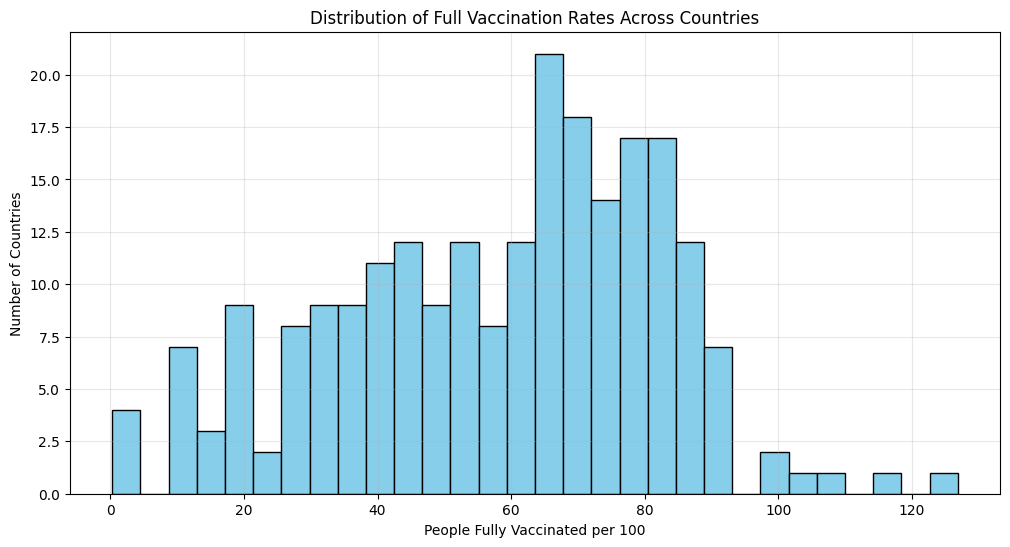

In [12]:
# Create vaccination histogram
plt.figure(figsize=(12, 6))
plt.hist(latest_data['people_fully_vaccinated_per_hundred'].dropna(),
         bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Full Vaccination Rates Across Countries')
plt.xlabel('People Fully Vaccinated per 100')
plt.ylabel('Number of Countries')
plt.grid(True, alpha=0.3)
plt.savefig('vaccination_histogram.png')
plt.show()
plt.close()

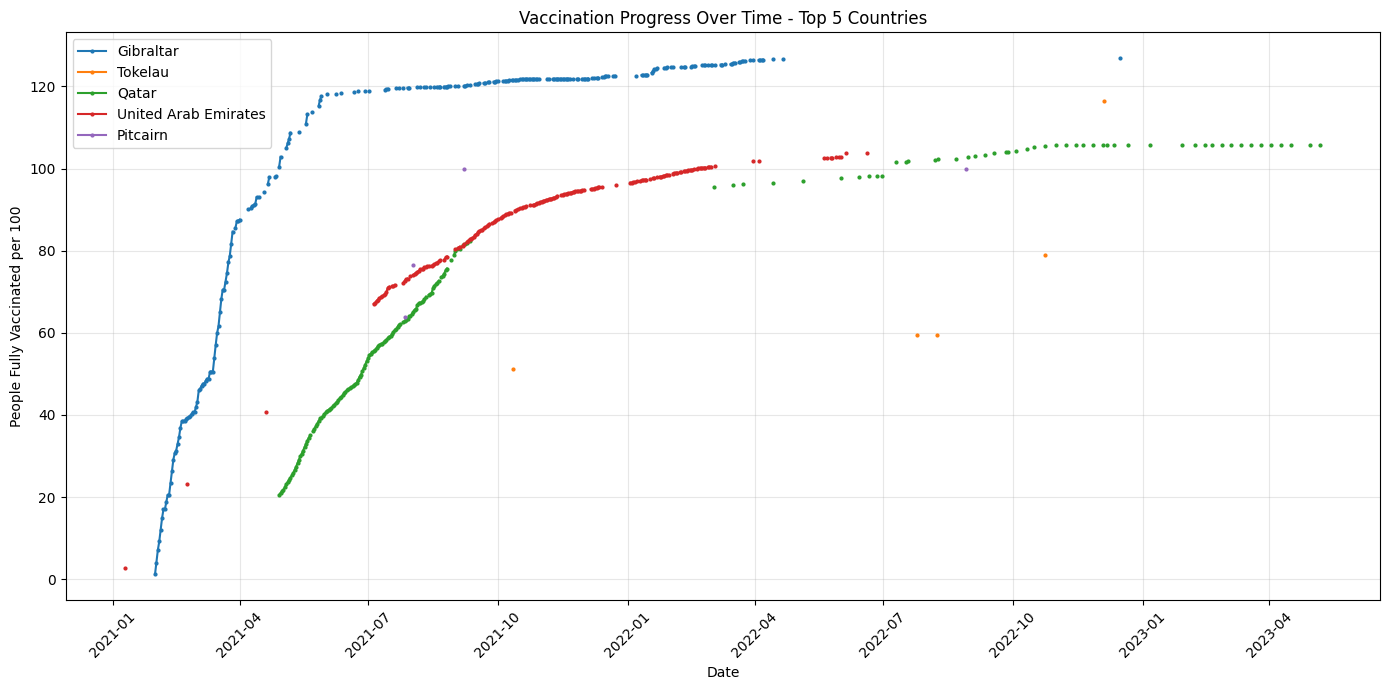

In [13]:
# Create vaccination timeline for top 5 countries
top_countries = latest_data.nlargest(5, 'people_fully_vaccinated_per_hundred')['location'].tolist()
timeline_data = df[df['location'].isin(top_countries)]

plt.figure(figsize=(14, 7))
for country in top_countries:
    country_data = timeline_data[timeline_data['location'] == country]
    plt.plot(country_data['date'],
            country_data['people_fully_vaccinated_per_hundred'],
            marker='o',
            markersize=2,
            label=country)

plt.title('Vaccination Progress Over Time - Top 5 Countries')
plt.xlabel('Date')
plt.ylabel('People Fully Vaccinated per 100')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('vaccination_timeline.png')
plt.show()
plt.close()

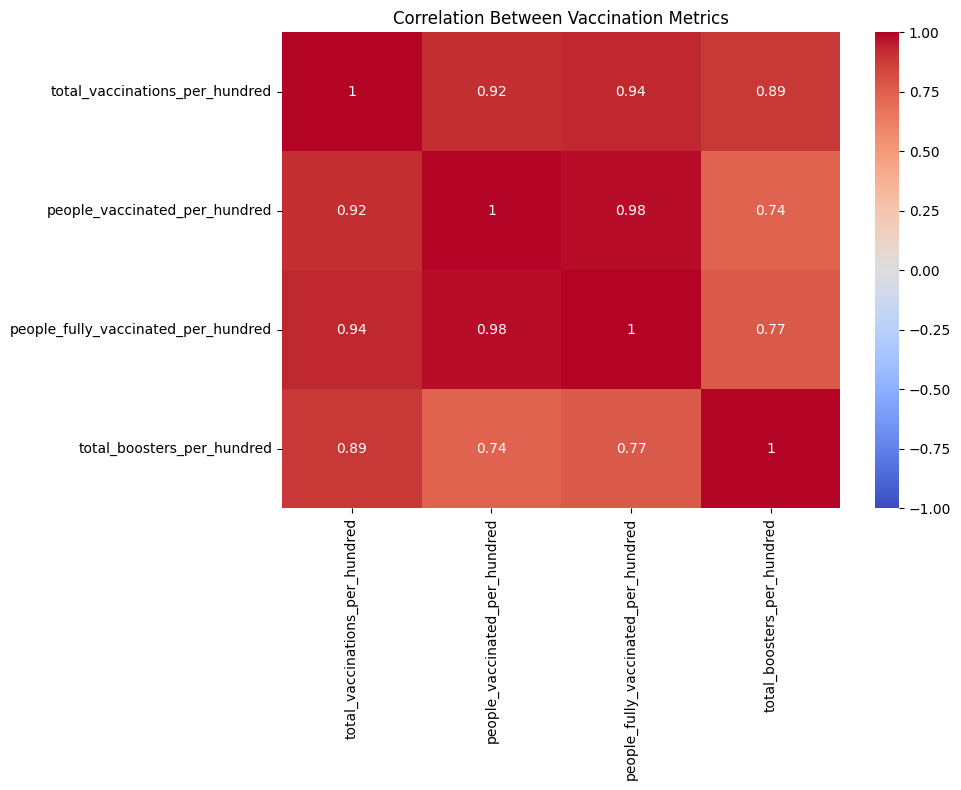

In [14]:
# Create correlation heatmap
correlation_vars = ['total_vaccinations_per_hundred',
                   'people_vaccinated_per_hundred',
                   'people_fully_vaccinated_per_hundred',
                   'total_boosters_per_hundred']

correlation_matrix = latest_data[correlation_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            vmin=-1,
            vmax=1)
plt.title('Correlation Between Vaccination Metrics')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()
plt.close()

In [11]:
# Generate statistics
basic_stats = latest_data['people_fully_vaccinated_per_hundred'].describe()
print("\nBasic Statistics for Full Vaccination Rates:")
print(basic_stats)

print("\nCorrelation Matrix:")
print(correlation_matrix)


Basic Statistics for Full Vaccination Rates:
count    227.000000
mean      58.139295
std       24.270571
min        0.280000
25%       40.535000
50%       63.240000
75%       77.085000
max      126.890000
Name: people_fully_vaccinated_per_hundred, dtype: float64

Correlation Matrix:
                                     total_vaccinations_per_hundred  \
total_vaccinations_per_hundred                             1.000000   
people_vaccinated_per_hundred                              0.918773   
people_fully_vaccinated_per_hundred                        0.936139   
total_boosters_per_hundred                                 0.888861   

                                     people_vaccinated_per_hundred  \
total_vaccinations_per_hundred                            0.918773   
people_vaccinated_per_hundred                             1.000000   
people_fully_vaccinated_per_hundred                       0.983994   
total_boosters_per_hundred                                0.735444   

        